<a href="https://colab.research.google.com/github/amnakhan1221/EDA/blob/main/Google_PlayStore_Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset (you may need to upload manually in Colab via the UI or use files.upload())
from google.colab import files
uploaded = files.upload()

# Read the CSV
df = pd.read_csv('googleplaystore.csv')


Saving googleplaystore.csv to googleplaystore.csv


In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.describe()
print(df.isnull().sum())
# Remove duplicate entries
df.drop_duplicates(inplace=True)
# Drop rows with missing target values
df.dropna(subset=['Rating'], inplace=True)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [10]:
df = df[df['Rating'] <= 5]



In [13]:
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(int)


In [15]:
df['Price'] = df['Price'].astype(str).str.replace('$', '').astype(float)
df['Reviews'] = df['Reviews'].astype(int)
df.dropna(inplace=True)

In [16]:
# Check cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   int64  
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   int64  
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   float64
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 971.9+ KB


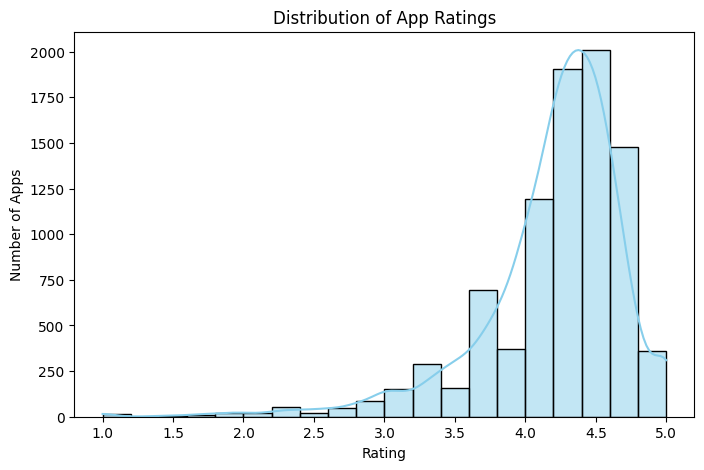

In [17]:
# Rating Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.show()

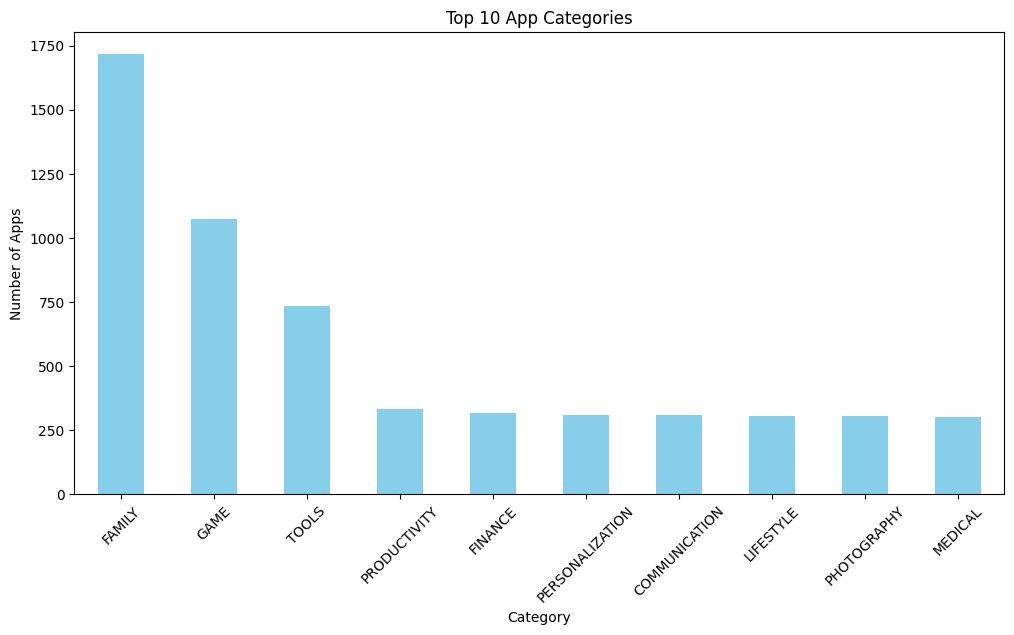

In [19]:
plt.figure(figsize=(12,6))
df['Category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 App Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation=45)
plt.show()


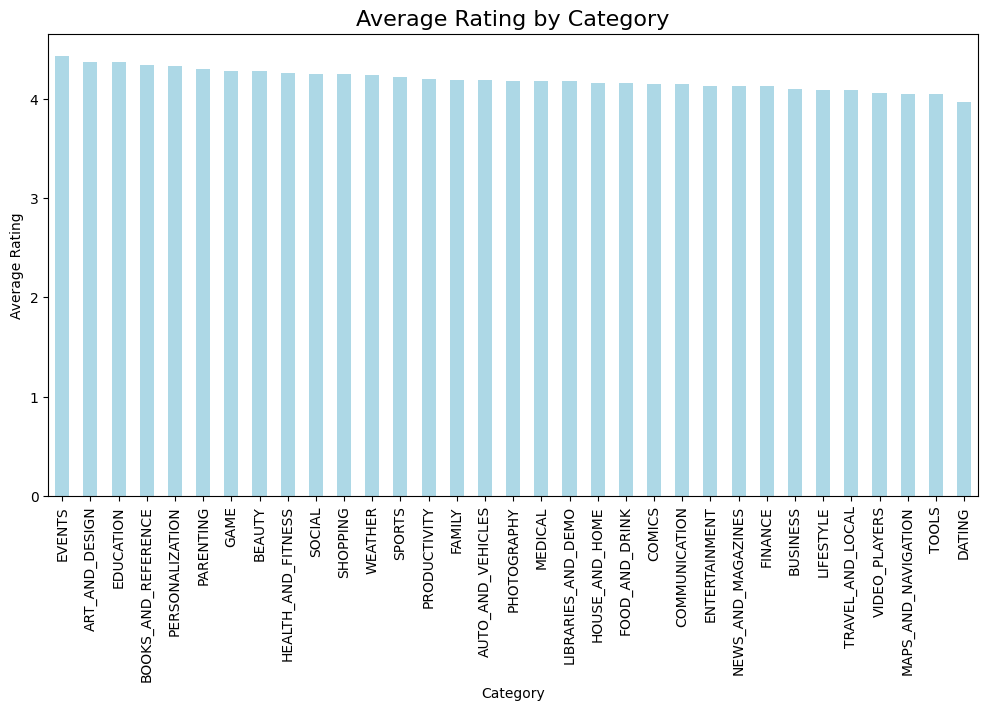

In [38]:
plt.figure(figsize=(12,6))
cat_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
cat_rating.plot(kind='bar', color='lightblue')
plt.title("Average Rating by Category", fontsize=16)
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()


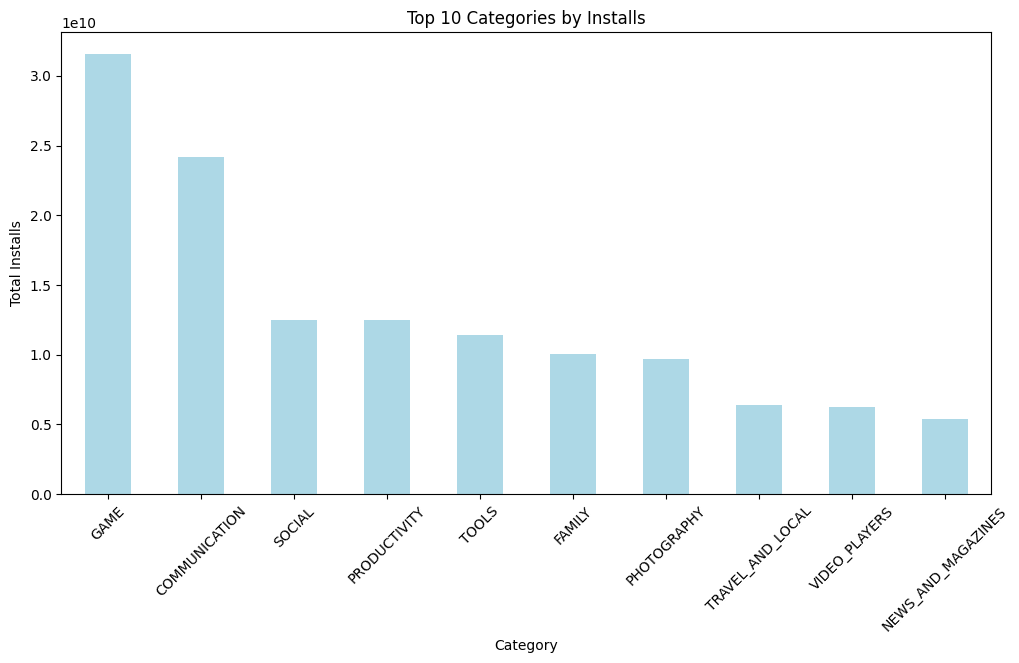

In [39]:
# Category vs Total Installs
plt.figure(figsize=(12,6))
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='lightblue')
plt.title("Top 10 Categories by Installs")
plt.ylabel("Total Installs")
plt.xticks(rotation=45)
plt.show()

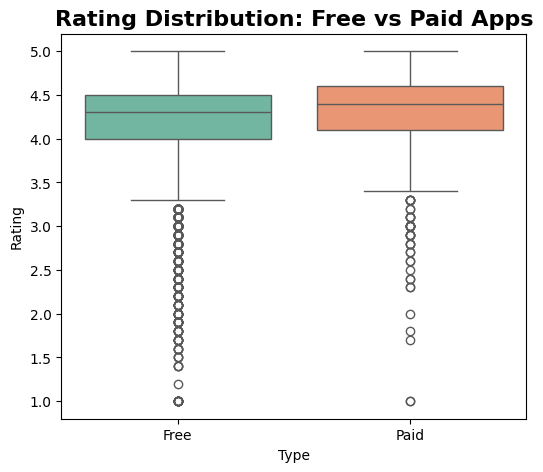

In [25]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Type', y='Rating', data=df, palette='Set2')
plt.title("Rating Distribution: Free vs Paid Apps", fontsize=16, fontweight='bold')
plt.show()


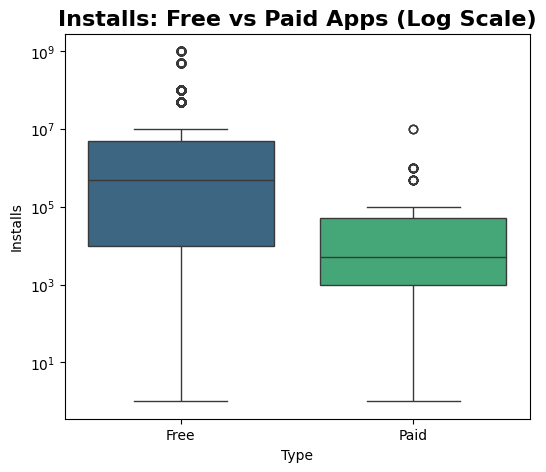

In [27]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Type', y='Installs', data=df, palette='viridis')  #  'viridis' color palette
plt.yscale('log')  # Logarithmic scale due to wide range of installs
plt.title("Installs: Free vs Paid Apps (Log Scale)", fontsize=16, fontweight='bold')
plt.show()


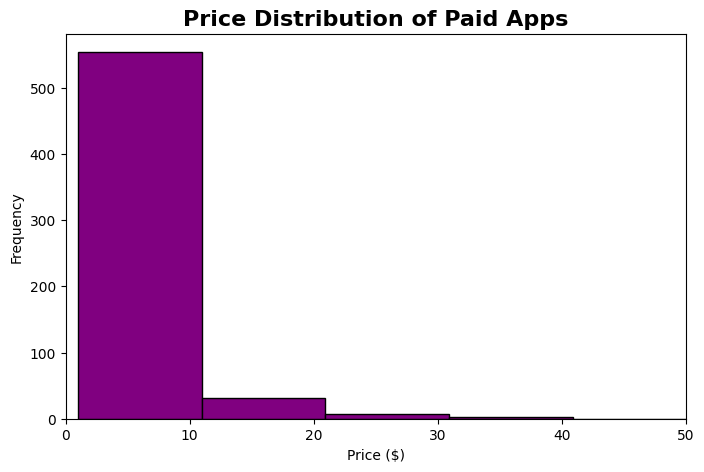

In [30]:
plt.figure(figsize=(8,5))
df[df['Type'] == 'Paid']['Price'].plot.hist(bins=40, color='purple', edgecolor='black')
plt.title("Price Distribution of Paid Apps", fontsize=16, fontweight='bold')
plt.xlabel("Price ($)")
plt.xlim(0, 50)
plt.show()


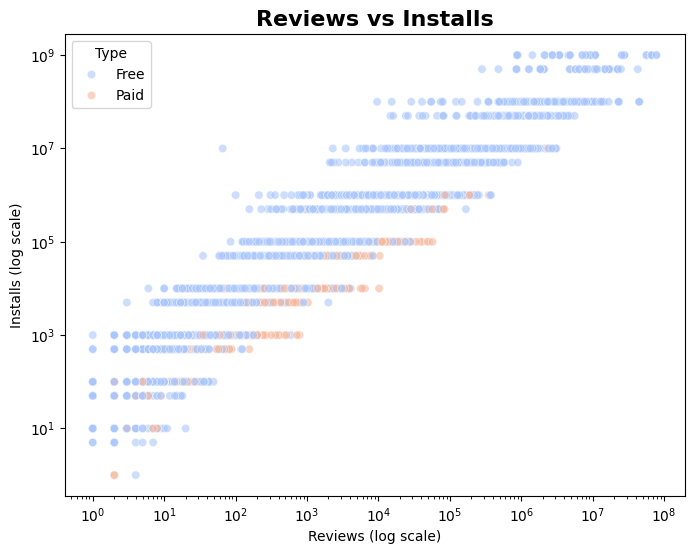

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Reviews', y='Installs', data=df, hue='Type', alpha=0.6, palette='coolwarm')
plt.xscale('log')
plt.yscale('log')
plt.title("Reviews vs Installs", fontsize=16, fontweight='bold')
plt.xlabel("Reviews (log scale)")
plt.ylabel("Installs (log scale)")
plt.show()


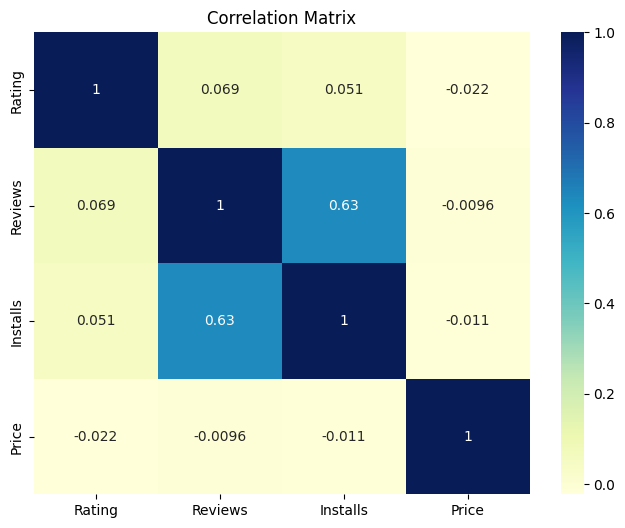

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Rating', 'Reviews', 'Installs', 'Price']].corr(), annot=True, cmap='YlGnBu')  # Changed to 'YlGnBu' for a light color scheme
plt.title("Correlation Matrix")
plt.show()
